In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Importing Dependencies**

In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.layers import Input, Embedding, LSTM, Dropout,GRU,BatchNormalization,Bidirectional, Dense, concatenate, Flatten, Conv1D, MaxPool1D, LeakyReLU, ELU, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras import regularizers
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [0]:
import nltk
from nltk.corpus import stopwords

# **Data Loading / Cleaning**

In [0]:
data = pd.read_csv("multi_hot_data_main.csv")

In [7]:
data.head()

,persons covered treaty eligibility,pe,business profits,shipping air transport,interest,royalty,royaltyfts,fts,independent personal services,dividend,capital gains,other treaty issues,gaar,income not includible in total income,profits gains from business profession,other sources,unexplained income,chapter via deductions,minimum alternate tax,prosecution,interest (interest on income tax refund),carry forward of losses,penalty,dispute resolution,section 9,refund processing section 143(1d),dividend distribution tax,para
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,consequently the forex loss was allowed as cla...
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,there is no document whatsoever to show that t...
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3 the ld cit(a) has erred in law and on facts...
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4 af ter hearing the learned representatives ...
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,8 section 36 (1)(iii) of the income tax act 1...


In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop = stopwords.words('english')

In [0]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# https://gist.github.com/sebleier/554280

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [13]:
from bs4 import BeautifulSoup
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(data['para'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())

100%|██████████| 25000/25000 [00:17<00:00, 1434.05it/s]


In [0]:
data["cleaned"] = preprocessed_text

In [15]:
data["cleaned"].head()

0    consequently forex loss allowed claimed assess...
1    no document whatsoever show sum lacswas given ...
2    ld cit erred law facts deleting disallowance m...
3    af ter hearing learned representatives parties...
4    section income tax act follows deductions prov...
Name: cleaned, dtype: object

In [16]:
data['cleaned'] = data['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['cleaned'].head()

0    consequently forex loss allowed claimed assess...
1    document whatsoever show sum lacswas given adv...
2    ld cit erred law facts deleting disallowance m...
3    af ter hearing learned representatives parties...
4    section income tax act follows deductions prov...
Name: cleaned, dtype: object

In [0]:
data["len"] = data["para"].str.split().str.len()

In [19]:
data.head()

,persons covered treaty eligibility,pe,business profits,shipping air transport,interest,royalty,royaltyfts,fts,independent personal services,dividend,capital gains,other treaty issues,gaar,income not includible in total income,profits gains from business profession,other sources,unexplained income,chapter via deductions,minimum alternate tax,prosecution,interest (interest on income tax refund),carry forward of losses,penalty,dispute resolution,section 9,refund processing section 143(1d),dividend distribution tax,para,cleaned,len
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,consequently the forex loss was allowed as cla...,consequently forex loss allowed claimed assess...,29
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,there is no document whatsoever to show that t...,document whatsoever show sum lacswas given adv...,65
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3 the ld cit(a) has erred in law and on facts...,ld cit erred law facts deleting disallowance m...,32
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4 af ter hearing the learned representatives ...,af ter hearing learned representatives parties...,63
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,8 section 36 (1)(iii) of the income tax act 1...,section income tax act follows deductions prov...,202


In [0]:
sample = data[(data['len'] >= 10) & (data['len'] <=1000)]

In [22]:
sample.shape

(24664, 30)

In [21]:
sample.head()

,persons covered treaty eligibility,pe,business profits,shipping air transport,interest,royalty,royaltyfts,fts,independent personal services,dividend,capital gains,other treaty issues,gaar,income not includible in total income,profits gains from business profession,other sources,unexplained income,chapter via deductions,minimum alternate tax,prosecution,interest (interest on income tax refund),carry forward of losses,penalty,dispute resolution,section 9,refund processing section 143(1d),dividend distribution tax,para,cleaned,len
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,consequently the forex loss was allowed as cla...,consequently forex loss allowed claimed assess...,29
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,there is no document whatsoever to show that t...,document whatsoever show sum lacswas given adv...,65
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3 the ld cit(a) has erred in law and on facts...,ld cit erred law facts deleting disallowance m...,32
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4 af ter hearing the learned representatives ...,af ter hearing learned representatives parties...,63
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,8 section 36 (1)(iii) of the income tax act 1...,section income tax act follows deductions prov...,202


# **Splitting Data / Preparation**

In [0]:
train, test = train_test_split(sample,test_size=0.2,random_state=123)

In [0]:
features_train = train.iloc[:,-3]
features_test = test.iloc[:,-3]

In [0]:
y_train = train.iloc[:,1:-3].values
y_test = test.iloc[:,1:-3].values

In [26]:
y_train.shape

(19731, 26)

In [0]:
# Filtering Text Data based on idf values

tfidf = TfidfVectorizer()
combine_tfidf = tfidf.fit_transform(features_train)

# converting to dictionary
combine_dict = dict(zip(tfidf.get_feature_names(),list(tfidf.idf_)))

In [0]:
tfidf_df = pd.DataFrame(list(combine_dict.items()), columns=['Words', 'IDF Values'])
tfidf_df = tfidf_df.sort_values(by ='IDF Values' )

Text(0.5, 1.0, 'Violin plot of idf')

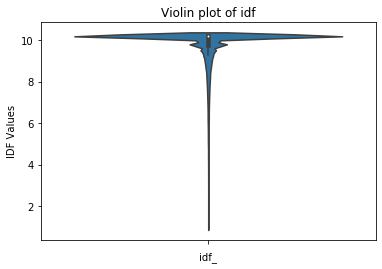

In [29]:
sns.violinplot(x = "IDF Values",data=tfidf_df,orient="v")
plt.xlabel("idf_")
plt.title("Violin plot of idf")

In [30]:
tfidf_df.head()

,Words,IDF Values
94472,the,1.032920
70709,of,1.065986
53630,in,1.204292
97533,to,1.260815
24945,and,1.282627


In [32]:
tfidf_df.tail(20)

,Words,IDF Values
16864,548780261013,10.19685
54061,incompleteand,10.19685
54063,incompleteparticulars,10.19685
54079,inconsequence,10.19685
54078,inconsciously,10.19685
16884,54butwe,10.19685
54076,inconnectible,10.19685
54075,inconnect,10.19685
54074,inconjunction,10.19685
16886,54del09,10.19685


In [0]:
corpus = tfidf_df[(tfidf_df['IDF Values'] >= 2) & (tfidf_df['IDF Values'] <=10)]

In [34]:
corpus.shape

(30026, 2)

In [35]:
vocab = corpus["Words"].tolist()
vocab[:10]

['under',
 'case',
 'this',
 'which',
 'no',
 'act',
 'with',
 'from',
 'section',
 'are']

In [38]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open("drive/My Drive/ content glove glove.42B.300d.txt") as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))


Loading word vectors...
Found 1917494 word vectors.


In [0]:
MAX_VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 300

In [0]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(vocab)
sequences_train = tokenizer.texts_to_sequences(features_train)
sequences_test = tokenizer.texts_to_sequences(features_test)

In [43]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 30026 unique tokens.


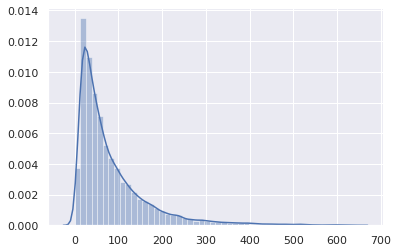

In [44]:
length = []

for i in sequences_train:

  length.append(len(i))

sns.set()
sns.distplot(length)

In [0]:
MAX_SEQUENCE_LENGTH = 200

In [46]:
encoded_train = pad_sequences(sequences_train,maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', encoded_train.shape)
encoded_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', encoded_test.shape)

Shape of data tensor: (19731, 200)
Shape of data tensor: (4933, 200)


In [47]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
        embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

Filling pre-trained embeddings...
(30026, 300)


# **Model Building**

In [52]:
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)



print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
x = Bidirectional(GRU(128, return_sequences=True, dropout=0.1,
                                                      recurrent_dropout=0.1))(x)
 
x = Conv1D(64, kernel_size=3, padding="valid", kernel_initializer="glorot_uniform")(x)
 
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
 
x = concatenate([avg_pool, max_pool])
 
preds = Dense(26, activation="sigmoid")(x)
 
model = Model(input_, preds)
 
model.summary()
 
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])

Building model...

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 200, 300)     9007800     input_3[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 200, 256)     329472      embedding_3[0][0]                
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 198, 64)      4921

In [0]:
# Callbacks
model_ = ModelCheckpoint('model_bilstm_multilabel_11 Dec.h5', save_best_only=True, monitor='val_loss', mode='min')
logdir = "logs/model_bilstm_multilabel/"
tensorboard_callback = TensorBoard(log_dir=logdir)

In [55]:
print('Training model...')
r = model.fit(
  encoded_train,
  y_train,
  batch_size=512,
  epochs=10,
  validation_data=(encoded_test,y_test),callbacks=[tensorboard_callback,model_]
)

Training model...


Train on 19731 samples, validate on 4933 samples


Epoch 1/10
19731/19731 [==============================] - 37s 2ms/step - loss: 0.2590 - acc: 0.9017 - val_loss: 0.1779 - val_acc: 0.9274

Epoch 2/10
19731/19731 [==============================] - 32s 2ms/step - loss: 0.1695 - acc: 0.9312 - val_loss: 0.1644 - val_acc: 0.9323
Epoch 3/10
19731/19731 [==============================] - 32s 2ms/step - loss: 0.1557 - acc: 0.9357 - val_loss: 0.1507 - val_acc: 0.9374
Epoch 4/10
19731/19731 [==============================] - 32s 2ms/step - loss: 0.1424 - acc: 0.9422 - val_loss: 0.1376 - val_acc: 0.9446
Epoch 5/10
19731/19731 [==============================] - 32s 2ms/step - loss: 0.1306 - acc: 0.9481 - val_loss: 0.1279 - val_acc: 0.9492
Epoch 6/10
19731/19731 [==============================] - 32s 2ms/step - loss: 0.1216 - acc: 0.9522 - val_loss: 0.1211 - val_acc: 0.9520
Epoch 7/10
19731/19731 [==============================] - 32s 2ms/step - loss: 0.1149 - acc: 0.9547 - val_

# **Result Analysis**

In [58]:
%reload_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 1106), started 0:01:34 ago. (Use '!kill 1106' to kill it.)

In [0]:
predictions = model.predict(encoded_test)

In [60]:
for thresh in np.arange(0.3, 0.601, 0.01):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(y_test, (predictions>thresh).astype(int),average="micro")))

F1 score at threshold 0.3 is 0.6952225730875013
F1 score at threshold 0.31 is 0.6946021261224069
F1 score at threshold 0.32 is 0.695860953076883
F1 score at threshold 0.33 is 0.6967421197376772
F1 score at threshold 0.34 is 0.6968156275086967
F1 score at threshold 0.35 is 0.6978428934421799
F1 score at threshold 0.36 is 0.6989188598886098
F1 score at threshold 0.37 is 0.6981569363204945
F1 score at threshold 0.38 is 0.697086188645607
F1 score at threshold 0.39 is 0.6967683819389707
F1 score at threshold 0.4 is 0.6965179790623578
F1 score at threshold 0.41 is 0.6967401285583104
F1 score at threshold 0.42 is 0.6961050986746917
F1 score at threshold 0.43 is 0.695342593673398
F1 score at threshold 0.44 is 0.6953502060035315
F1 score at threshold 0.45 is 0.6941923236637599
F1 score at threshold 0.46 is 0.6930338152706417
F1 score at threshold 0.47 is 0.692335459030201
F1 score at threshold 0.48 is 0.6897095385361712
F1 score at threshold 0.49 is 0.6878093492208982
F1 score at threshold 0.5 

In [62]:
for thresh in np.arange(0.6, 0.901, 0.01):
    thresh = np.round(thresh, 2)
    print("Precision score at threshold {0} is {1}".format(thresh, metrics.precision_score(y_test, (predictions>thresh).astype(int),average="micro")))

Precision score at threshold 0.6 is 0.8780573640682738
Precision score at threshold 0.61 is 0.8825209783967148
Precision score at threshold 0.62 is 0.8865530989488946
Precision score at threshold 0.63 is 0.8916728076639646
Precision score at threshold 0.64 is 0.8947664603263928
Precision score at threshold 0.65 is 0.8985313751668892
Precision score at threshold 0.66 is 0.9033009708737864
Precision score at threshold 0.67 is 0.9068985965605851
Precision score at threshold 0.68 is 0.9108254669612372
Precision score at threshold 0.69 is 0.9131144197430144
Precision score at threshold 0.7 is 0.9161976235146967
Precision score at threshold 0.71 is 0.9190739167374682
Precision score at threshold 0.72 is 0.923493714781101
Precision score at threshold 0.73 is 0.9265873015873016
Precision score at threshold 0.74 is 0.9303426510369702
Precision score at threshold 0.75 is 0.9327963176064442
Precision score at threshold 0.76 is 0.9362952515279737
Precision score at threshold 0.77 is 0.940582150589

In [63]:
print(metrics.classification_report(np.argmax(y_test,axis=1),np.argmax(predictions,axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.59      0.70      2555
           9       0.60      0.34      0.43       720
          10       0.56      0.27      0.37        51
          12       0.33      0.12      0.18       104
          13       0.31      0.26      0.28       313
          14       0.24      0.43      0.31       196
          15       0.27      0.14      0.18       153
          17       0.27      0.52      0.36        96
          20       0.26      0.35      0.30       178
          21       0.36      0.90      0.52       254
          23       0.19      0.72      0.30       138
          24       0.20      0.42      0.27        64
          25       0.13      0.36      0.19       111

    accuracy                           0.50      4933
   macro avg       0.35      0.42      0.34      4933
weighted avg       0.62      0.50      0.53      4933

